## Restaurant Business Analysis

we will try through theses datasets to know how restaurants act during Covid-19, what makes difference with sales during covid, people food behaviour during 2020 and how it's affecting on future restaurants

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/restaurant-business-rankings-2020/Top250.csv
/kaggle/input/restaurant-business-rankings-2020/Future50.csv
/kaggle/input/restaurant-business-rankings-2020/Independence100.csv


In [2]:
### Imports
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import re
from PIL import Image

In [3]:
df_250 = pd.read_csv('../input/restaurant-business-rankings-2020/Top250.csv')
df_future = pd.read_csv('../input/restaurant-business-rankings-2020/Future50.csv')
df_ind = pd.read_csv('../input/restaurant-business-rankings-2020/Independence100.csv')

## Top 250 Resturants

Trying to figure out what happend to Top Resturants Sales During 2020 and Extracting Imformative insights

### Feature Engineering

In [4]:
df_250.drop(['Content','Headquarters'],axis=1,inplace=True)

#### Null Values Checikng

In [5]:
print ("Rows     : " ,df_250.shape[0])
print ("Columns  : " ,df_250.shape[1])
print ("\nFeatures : \n" ,df_250.columns.tolist())
print ("\nMissing values :  ", df_250.isnull().sum().values.sum())
print ("\nUnique values :  \n",df_250.nunique())

Rows     :  250
Columns  :  7

Features : 
 ['Rank', 'Restaurant', 'Sales', 'YOY_Sales', 'Units', 'YOY_Units', 'Segment_Category']

Missing values :   0

Unique values :  
 Rank                250
Restaurant          250
Sales               203
YOY_Sales           172
Units               214
YOY_Units           140
Segment_Category     48
dtype: int64


#### Rename Columns

In [6]:
df_250.rename(columns={'Units':'Branches','Segment_Category':'sub_category'},inplace=True)

In [7]:
## Checking for any independence restaurant in top 250
rest_ind = list(df_ind['Restaurant'].values)
df_250['ind_100']=df_250['Restaurant'].apply(lambda x:1 if x in rest_ind else 0 )
df_250['ind_100'].value_counts()

0    250
Name: ind_100, dtype: int64

#### Deal with floats instead of percentages

In [8]:
df_250['YOY_Sales']=df_250['YOY_Sales'].apply(lambda x:x.replace('%',''))
df_250['YOY_Units']=df_250['YOY_Units'].apply(lambda x:x.replace('%',''))
#====
df_250['YOY_Sales']= pd.to_numeric(df_250['YOY_Sales'])
df_250['YOY_Units']=pd.to_numeric(df_250['YOY_Units'])
#====

In [9]:
df_250.describe()

,Rank,Sales,YOY_Sales,Branches,YOY_Units,ind_100
count,250.000000,250.00000,250.000000,250.000000,250.000000,250.0
mean,125.500000,1242.74000,2.938400,850.076000,1.219200,0.0
std,72.312977,3365.22882,8.953784,2296.151659,7.936431,0.0
min,1.000000,126.00000,-21.200000,13.000000,-32.800000,0.0
25%,63.250000,181.00000,-2.375000,85.000000,-2.025000,0.0
50%,125.500000,330.00000,2.200000,207.000000,0.000000,0.0
75%,187.750000,724.75000,6.575000,555.250000,3.475000,0.0
max,250.000000,40412.00000,39.500000,23801.000000,38.500000,0.0


In [10]:
## Manipulate with YOY values
df_250['Sales_year']=df_250['YOY_Sales'].apply(lambda x:'positive' if x>0 else 'negative')
df_250['unit_stat']=df_250['YOY_Units'].apply(lambda x:'positive' if x>0 else 'negative')

In [11]:
## Making Category Feature
df_250['category']=df_250['sub_category'].apply(lambda x:x.replace('Quick Service & Burger','Burger').replace(
                                                      'Italian/Pizza','Pizza').replace('Quick Service & Pizza','Pizza').replace(
'Bakery Cafe ','Cafe').replace('Coffee Cafe','Cafe')).replace('Quick Service & Chicken','Chicken').replace('Casual Dining & Pizza','Pizza').replace(
'Quick Service & Cafe','Cafe').replace('Fast Casual & Pizza','Pizza').replace('Fast Casual & Bakery Cafe','Cafe').replace('Quick Service & Frozen Desserts','Dessert').replace(
'Quick Service & Family Casual','Family').replace('Casual Dining & Asian','Asian').replace('Asian/Noodle','Asian').replace('Casual Dining & Seafood','Seafood').replace(
'Bakery Cafe','Cafe').replace('Frozen Desserts','Dessert').replace('Family Dining & Family Style','Family').replace('Fast Casual & Sandwich','Sandwich').replace(
'Family Casual','Family').replace('Fast Casual & Chicken','Chicken').replace('Fast Casual & Burger','Burger').replace('Casual Dining & Steak','Steak').replace(
'Casual Dining & Sports Bar','Sports Bar').replace('Quick Service & Mexican','Mexican').replace('Quick Service & Mexican','Mexican').replace(
'Quick Service & Seafood','Seafood').replace('Quick Service & Sandwich','Sandwich').replace('Seafodd','Seafood').replace('Fine Dining & Steak','Steak').replace(
'Quick Service & Bakery Cafe','Cafe').replace('Fast Casual & Asian/Noodle','Asia').replace('Quick Service & Snack','Snack').replace(
'Fast Casual & Mexican','Mexican').replace('Quick Service & Beverage','Drinks').replace('Asian','Asia').replace('Sports Bar','Sports Bar').replace(
'Casual Dining & Varied Menu','Varied Menu').replace('Steak','Meat').replace('BBQ','Meat').replace('Family Style','Family')

In [12]:
df_250.head()

,Rank,Restaurant,Sales,YOY_Sales,Branches,YOY_Units,sub_category,ind_100,Sales_year,unit_stat,category
0,1,McDonald's,40412,4.9,13846,-0.5,Quick Service & Burger,0,positive,negative,Burger
1,2,Starbucks,21380,8.6,15049,3.0,Quick Service & Coffee Cafe,0,positive,positive,Cafe
2,3,Chick-fil-A,11320,13.0,2470,5.0,Quick Service & Chicken,0,positive,positive,Chicken
3,4,Taco Bell,11293,9.0,6766,2.7,Quick Service & Mexican,0,positive,positive,Mexican
4,5,Burger King,10204,2.7,7346,0.2,Quick Service & Burger,0,positive,positive,Burger


## EDA-Data Visualization

### YOY Distribution

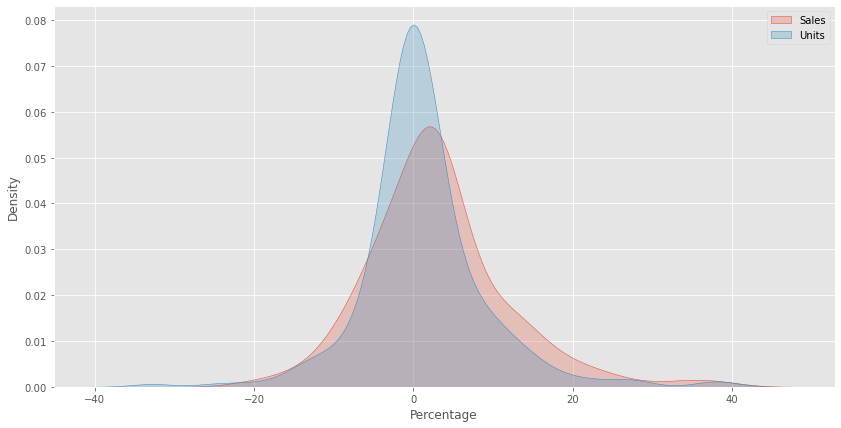

In [13]:
plt.figure(figsize=(14,7))
sns.kdeplot(df_250['YOY_Sales'].values, shade = True)
sns.kdeplot(df_250['YOY_Units'].values, shade = True)
plt.legend(['Sales','Units'])
plt.xlabel('Percentage');

### These Distributions shows us that year on year sales percentage no more than 40%

### Correlation With Sales

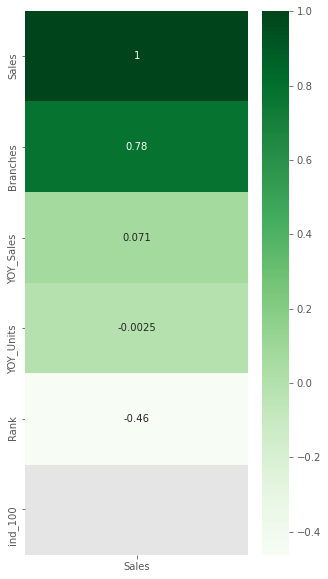

In [14]:
corr = df_250.corr().loc[:,['Sales']]

fig, ax = plt.subplots(figsize=(5,10))

ax = sns.heatmap(corr.sort_values(by=['Sales'],ascending=False), ax=ax,annot=True,cbar=True,cmap="Greens")
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)

plt.show()

## Sales High Correlated with Branches

### YOY Sales Indicator

In [15]:
plt.figure(figsize=(14,7));
Platform = df_250['Sales_year'].value_counts(sort = True).index
Count = df_250['Sales_year'].value_counts(sort = True)
#====
fig = px.pie(names = Platform,
             values = Count,
             title='Positive - Negative')
fig.update_traces(textposition='inside', textinfo='percent+label')


<Figure size 1008x504 with 0 Axes>

Although the restaurants were on the best list during the year, about 35% of restaurants had negative indicators

## Restaurant Category and Sub Category

In [16]:
plt.figure(figsize=(40,40));

df = px.data.tips()
fig = px.sunburst(df_250, path=['category', 'sub_category'], values='Sales')
fig.show()

<Figure size 2880x2880 with 0 Axes>

sunburst shows that quick-service subcategory always get high sales

## Category Sales Indicator

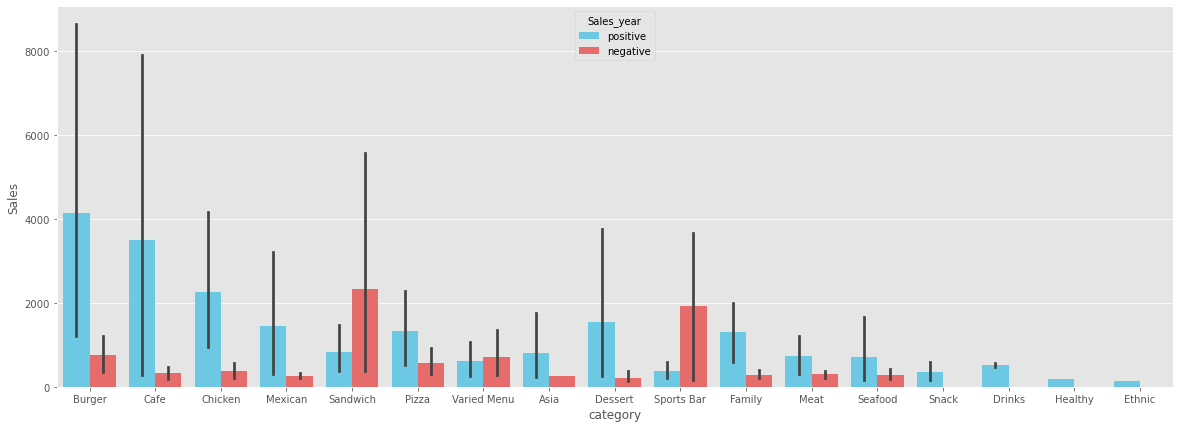

In [17]:
plt.figure(figsize=(20,7))
#=== 
pal = ["#58D3F7","#FA5858"]
#=== 
sns.barplot(data=df_250,x=df_250['category'],y=df_250['Sales'],hue=df_250['Sales_year'],palette=pal);

varied menu, sandwiches and sports bar had negative indicators more than positive

## Top Resturants In Best Category

#### Pizza 🍕

In [18]:
pizza = df_250.query("category == 'Pizza'")[:10]

fig = px.bar(pizza,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Viridis',
             title='Pizza Sales Top Restaurants')
fig.show()

#### Burger 🍔

In [19]:
Burger = df_250.query("category == 'Burger'")[:10]

fig = px.bar(Burger,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='BlackBody',
             title='Burger Top Restaurants')
fig.show()

#### Varied Menu ✔️

In [20]:
VariedMenu = df_250.query("category == 'Varied Menu'")[:10]

fig = px.bar(VariedMenu,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Plotly3',
             title='VariedMenu Top Restaurants')
fig.show()

#### Family 👪

In [21]:
Family = df_250.query("category == 'Family'")[:10]

fig = px.bar(Family,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Turbo',
             title='Family Top Restaurants')
fig.show()

#### Meat 🥩

In [22]:
Meat = df_250.query("category == 'Meat'")[:10]

fig = px.bar(Meat,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Jet',
             title='Meat Top Restaurants')
fig.show()

#### Mexican 🌮

In [23]:
Mexican = df_250.query("category == 'Mexican'")[:10]

fig = px.bar(Mexican,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Aggrnyl',
             title='Mexican Top Restaurants')
fig.show()

#### Cafe ☕

In [24]:
Cafe = df_250.query("category == 'Cafe'")[:10]

fig = px.bar(Cafe,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Darkmint',
             title='Cafe Top Restaurants')
fig.show()

#### Sandwich 🥪

In [25]:
Sandwich = df_250.query("category == 'Sandwich'")[:10]

fig = px.bar(Sandwich,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Magenta',
             title='Sandwich Top Restaurants')
fig.show()

#### Chicken 🐔

In [26]:
Chicken = df_250.query("category == 'Chicken'")[:10]

fig = px.bar(Chicken,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Brwnyl',
             title='Chicken Top Restaurants')
fig.show()

#### Drinks 🍸

In [27]:
Drinks = df_250.query("category == 'Drinks'")[:10]

fig = px.bar(Drinks,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='thermal',
             title='Drinks Top Restaurants')
fig.show()

## Notes

1-Number Branches is The Highest Correlated With Sales

2-35% YOY for Top Restaurants are Negative

3-Burger Restaurants is the highest Sales in 2020

4-Quick Service is an optimal solution to get high sales

5-Sports Bar and Sandwich Restaurants face Big losses

## Top 50 Future Restaurants

#### Study High Sales indicates

### Top Commin' Restaurant Study

In [28]:
df_future.head(10)

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes
5,6,Playa Bowls,"Belmar, N.J.",39,62.9%,76,28.8%,580,Yes
6,7,The Simple Greek,"Blue Bell, Pa.",24,52.5%,36,33.3%,775,Yes
7,8,Melt Shop,"New York, N.Y.",20,39.6%,19,35.7%,1260,Yes
8,9,Creamistry,"Yorba Linda, Calif.",24,36.8%,60,27.7%,465,Yes
9,10,Joella's Hot Chicken,"Louisville, Ky.",29,35.5%,17,30.8%,1930,No


## Franchising

In [29]:
Platform = df_future['Franchising'].value_counts(sort = True).index
Count = df_future['Franchising'].value_counts(sort = True)
#====
fig = px.pie(names = Platform,
             values = Count,
             title='Franchising Or Not')
fig.update_traces(textposition='inside', textinfo='percent+label')

### Franchising / Sales

In [30]:
df_future['YOY_Sales']=df_future['YOY_Sales'].apply(lambda x:x.replace('%',''))
#====
df_future['YOY_Sales']= pd.to_numeric(df_future['YOY_Sales'])
#===
franch = df_future.groupby('Franchising',as_index=False).agg({'YOY_Sales':'sum'})
fig = px.bar(franch,
             x='Franchising',
             y='YOY_Sales',
             color='YOY_Sales',
             color_continuous_scale='thermal',
             title='Franchising Or not')
fig.show()

### Correlation with YOY

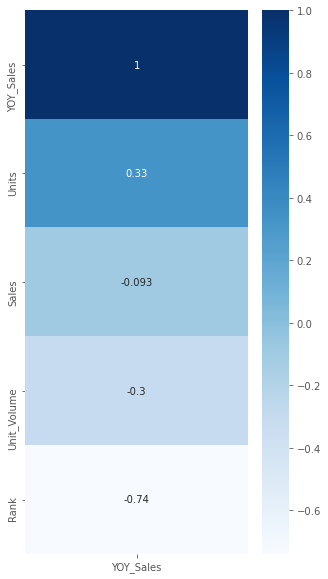

In [31]:
corr = df_future.corr().loc[:,['YOY_Sales']]

fig, ax = plt.subplots(figsize=(5,10))

ax = sns.heatmap(corr.sort_values(by=['YOY_Sales'],ascending=False), ax=ax,annot=True,cbar=True,cmap="Blues")
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)

plt.show()

# Study Future Restaurants Categories

### Most of them depending on organic food

#### Notes
The demand for organic produce and foods continues to rise across the nation and many consumers are prioritizing nutrition and immunity-boosting ingredients in an effort to protect themselves and their families against COVID-19

## Future Restaurants Brand Names words

In [32]:
rest = df_future['Restaurant'].drop_duplicates()
#==== 
all_sentences = []

for word in rest:
    all_sentences.append(word)

all_sentences

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
     lines.append(w)
#=== 


lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)
#== 
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
#== 
import spacy
nlp = spacy.load('en_core_web_lg')
#== 
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
#== 
df = pd.DataFrame(stem2) 
rest_All = " ".join(rest for rest in df[0])
#=== 
c_mask = np.array(Image.open("../input/wordcloudterry/44.jpg"))
#== 
wc = WordCloud(background_color='white', mask=c_mask, mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='indigo',colormap='inferno')
wc.generate(rest_All)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '../input/wordcloudterry/44.jpg'

## Is diet Related to your Infection with Corona

Now we are trying to find if there is a relationship between some food products and the high rates of infection with the Coronavirus

In [33]:
df_health = pd.read_csv('../input/covid19-healthy-diet-dataset/Food_Supply_Quantity_kg_Data.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../input/covid19-healthy-diet-dataset/Food_Supply_Quantity_kg_Data.csv'

## Correlations

In [34]:
corr = df_health.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

NameError: name 'df_health' is not defined

#### Manipulate With Features

In [35]:
df_health['Alcohol']=df_health['Alcoholic Beverages']
df_health['animal_products']=df_health['Animal Products']+df_health['Eggs']+df_health['Animal fats']+df_health['Meat']+df_health['Fish, Seafood']+df_health['Aquatic Products, Other']+df_health['Milk - Excluding Butter']
df_health['vegan products']=df_health['Fruits - Excluding Wine']+df_health['Oilcrops']+df_health['Pulses']+df_health['Spices']+df_health['Starchy Roots']+df_health['Sugar Crops']+df_health['Treenuts']+df_health['Vegetable Oils']+df_health['Vegetables']+df_health['Vegetal Products']
df_health['manufactured product']=df_health['Stimulants']+df_health['Sugar & Sweeteners']
df_health['other']=df_health['Miscellaneous']+df_health['Offals']

NameError: name 'df_health' is not defined

## Confirmed Cases & Veg_products

In [36]:
df_veg=df_health[['Country','Alcohol','animal_products','vegan products','manufactured product','other','Confirmed', 'Deaths',
       'Recovered']]
fig = px.choropleth(df_veg, 
                    locations='Country', locationmode='country names',
                    color='Confirmed', hover_name='vegan products', 
                    color_continuous_scale="Peach", hover_data=['vegan products'],
                    title='Country Confiremed Cases Percentage Hovering with Veg_products')
fig.update(layout_coloraxis_showscale=False)
fig.show();

NameError: name 'df_health' is not defined

we will notice here the negative correlation between confirmed cases and veg_product

## VEGAN VS ANIMAL

In [37]:
sns.set(font_scale=1.8)
plt.figure(figsize=(20,10))
df_behav=df_health[['Alcohol','animal_products','vegan products','manufactured product','other','Confirmed', 'Deaths',
       'Recovered']]
sns.heatmap(df_behav.corr(),annot=True,cmap="cool")

NameError: name 'df_health' is not defined

<Figure size 1440x720 with 0 Axes>

We note here that vegan products have an inverse relationship with the number of Confirmed cases (-5) , unlike animal products(+6), and this is a logical explanation for why evergreens restaurant was the most increase in sales rates during the Corona pandemic

## PairGrid

In [38]:
sns.set(font_scale=1)
returns_fig = sns.PairGrid(df_behav)
#csutom plots easy to see 
returns_fig.map_upper(sns.kdeplot,cmap='cool_d')
returns_fig.map_lower(plt.scatter,color='purple')
returns_fig.map_diag(plt.hist,bins=40)

NameError: name 'df_behav' is not defined

# Conclusion

1- During The corona pandemic, The Most were eating organic food

2- Restaurants That rely on gatherings have faced significant losses

3- Number of branches forms a big difference in sales, it helps to provide Quick Services

4- It is worth relying on franchising for its high potential in achieving high sale

5- Going Vegan Can Reduce Severity Of COVID-19